In [191]:
a = []
for i in range(13):
    if i in [1, 3, 5, 7, 8, 10, 12]:
        for j in range(1, 32):
            if i < 10:
                s1 = '0'+ str(i)
            else:
                s1 = str(i)
            if j < 10:
                s2 = '0'+ str(j)
            else:
                s2 = str(j)
            a.append("2019년 {}월 {}일".format(s1, s2))
    elif i in [4, 6, 9, 11]:
        for j in range(1, 31):
            if i < 10:
                s1 = '0'+ str(i) 
            else:
                s1 = str(i)
            if j < 10:
                s2 = '0'+ str(j)
            else:
                s2 = str(j)
            a.append("2019년 {}월 {}일".format(s1, s2))
    elif i == 2:
        for j in range(1, 29):
            if i < 10:
                s1 = '0'+ str(i) 
            else:
                s1 = str(i)
            if j < 10:
                s2 = '0'+ str(j)
            else:
                s2 = str(j)
            a.append("2019년 {}월 {}일".format(s1, s2))
        
a = pd.DataFrame(a)
a

,0
0,2019년 01월 01일
1,2019년 01월 02일
2,2019년 01월 03일
3,2019년 01월 04일
4,2019년 01월 05일
...,...
360,2019년 12월 27일
361,2019년 12월 28일
362,2019년 12월 29일
363,2019년 12월 30일


In [238]:
주가데이터 = pd.read_csv('../01_제공데이터/주가데이터.csv')
주가데이터 = 주가데이터.sort_values(by = '날짜')

In [239]:
#pd.concat([주가데이터, a], axis=0, join='outer')
주가데이터2 = pd.merge(주가데이터, a, on='날짜', how='outer')
주가데이터2 = 주가데이터2.sort_values(by='날짜')
주가데이터2

,날짜,종가,오픈,고가,저가,거래량,변동 %
247,2019년 01월 01일,NaN,NaN,NaN,NaN,NaN,NaN
0,2019년 01월 02일,"12,600","12,700","12,900","12,600",9.14K,-1.56%
1,2019년 01월 03일,"12,600","12,700","13,100","12,600",21.78K,0.00%
2,2019년 01월 04일,"12,600","12,600","12,900","12,500",8.07K,0.00%
248,2019년 01월 05일,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
245,2019년 12월 27일,"9,380","9,230","9,420","9,200",13.70K,1.08%
362,2019년 12월 28일,NaN,NaN,NaN,NaN,NaN,NaN
363,2019년 12월 29일,NaN,NaN,NaN,NaN,NaN,NaN
246,2019년 12월 30일,"9,450","9,380","9,460","9,300",7.76K,0.75%


In [240]:
주가데이터2 = 주가데이터2.fillna(method = 'ffill')
주가데이터2 = 주가데이터2.fillna(method = 'bfill')
#plt.plot(실적데이터.주문량, 주가데이터.거래

주가데이터2.거래량=주가데이터2.거래량.map(lambda x : x[:-1])
주가데이터2.거래량=pd.to_numeric(주가데이터2.거래량)
주가데이터2.거래량=주가데이터2.거래량*1000

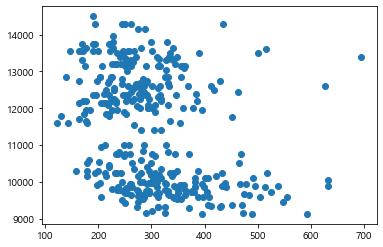

In [254]:
plt.scatter(실적데이터.pivot_table(index=['월','일'], values='주문량', aggfunc='mean'), pd.to_numeric(주가데이터2.종가.map(lambda x : x.replace(",",""))))

In [291]:
temp = pd.concat([실적데이터.pivot_table(index=['월','일'], values='주문량', aggfunc='mean').reset_index(), 주가데이터2.종가], axis=1)

In [292]:
temp.종가 = pd.to_numeric(temp.종가.map(lambda X: X.replace(",","")))

In [293]:
temp.corr()

,월,일,주문량,종가
월,1.000000,0.011893,0.285472,-0.476831
일,0.011893,1.000000,0.241356,-0.022677
주문량,0.285472,0.241356,1.000000,-0.242000
종가,-0.476831,-0.022677,-0.242000,1.000000


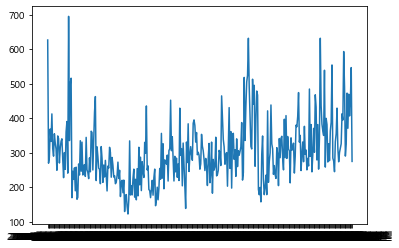

In [274]:
plt.plot(주가데이터2.날짜, 실적데이터.pivot_table(index=['월','일'], values='주문량', aggfunc='mean'))

In [259]:
주가데이터2.날짜

247    2019년 01월 01일
0      2019년 01월 02일
1      2019년 01월 03일
2      2019년 01월 04일
248    2019년 01월 05일
           ...      
245    2019년 12월 27일
362    2019년 12월 28일
363    2019년 12월 29일
246    2019년 12월 30일
364    2019년 12월 31일
Name: 날짜, Length: 365, dtype: object

In [58]:
# 빅콘테스트 2020

In [110]:
# 데이터 전처리, 시각화 라이브러리 import 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic') 

# 학습모델 및 평가 도구 import 
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
import  sklearn.metrics as mt
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

# 0-1 전처리 라이브러리 import 
from sklearn.preprocessing import MinMaxScaler

# 인공신경망 모델 라이브러리 import 
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [230]:
# 빅콘테스트 기본 제공 데이터(홈쇼핑 실적, 시청률) 불러오기
실적데이터1 = pd.read_excel('../01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터.xlsx', header=1)
평가데이터1 = pd.read_excel('../02_평가데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx', header=1)
시청률데이터1 = pd.read_excel('../01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx', header=1)

# 시청률데이터1 전처리

# 행과 열의 마지막 잘라내기 (평균 낸거 지우기)
시청률데이터1 = 시청률데이터1.iloc[:-1, :-1]

# 시간대 뒤에 ':00붙이기'  <- 성과데이터의 데이터화 규격 맞추기 위함.
시청률데이터1['시간대'] = 시청률데이터1['시간대'] + ':00'

# 시간대열 인덱스로 바꾸기
시청률데이터1.set_index('시간대', inplace=True)

# 외부데이터 강수량, 풍속, 기온 데이터
강수량1 = pd.read_csv('../01_제공데이터/강수량.csv', encoding='euc-kr')
풍속1 = pd.read_csv('../01_제공데이터/풍속.csv', encoding='euc-kr')
기온1 = pd.read_csv('../01_제공데이터/기온.csv', encoding='euc-kr')

# 강수량, 풍속, 기온 데이터에서 원하는 열만 선택하여 성과데이터에 합칠 준비
강수량 = 강수량1.sort_values(by = '일시')
풍속 = 풍속1.sort_values(by = '일시')
기온 = 기온1.sort_values(by = '일시')

풍속.일시=pd.to_datetime(풍속.일시).map(lambda x : str(x).split(" ")[0])

강수량 = 강수량[['일시', '평균일강수량(mm)']]
풍속 = 풍속[['일시', '최대풍속(m/s)']]
기온 = 기온[['일시', '평균최고기온(℃)', '평균최저기온(℃)']]

강수량.index = list(range(365))
풍속.index = list(range(365))
기온.index = list(range(365))

In [231]:
# 데이터 매번 불러오지 않기 위해 복사해서 저장
실적데이터 = 실적데이터1.copy()
시청률데이터 = 시청률데이터1.copy()
평가데이터 = 평가데이터1.copy()

# 컬럼명 변경 (노출(분) -> 노출만 변경)
실적데이터.columns = ['방송일시', '노출', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액']

# 결측치 제거 (취급액은 0으로, 노출은 위의 값으로 채움)
실적데이터.취급액 = 실적데이터.취급액.fillna(0)
실적데이터.노출 = 실적데이터.노출.fillna(method = 'ffill')

# 2020 데이터 지우기
실적데이터 = 실적데이터[:38300]

# 방송일시로부터 시간(월, 주, 요일, 일, 시간, ) 데이터 열로 추가
dt = datetime.datetime.now()

실적데이터['요일'] = 실적데이터['방송일시'].dt.dayofweek
실적데이터['월']  = 실적데이터['방송일시'].dt.month
실적데이터['주'] = 실적데이터['방송일시'].dt.week
실적데이터['시간']  = 실적데이터['방송일시'].dt.time
실적데이터['시']  = 실적데이터['방송일시'].dt.hour
실적데이터['일'] = 실적데이터['방송일시'].dt.day
실적데이터['분'] = 실적데이터['방송일시'].dt.minute

실적데이터['방송시간'] = 실적데이터.방송일시.apply(lambda x : str(x)).apply(lambda x : x.split(' ')[1][:])
실적데이터['일시'] = 실적데이터.방송일시.apply(lambda x : str(x)).apply(lambda x : x.split(' ')[0])

최고시청률=[]
for i in range(len(실적데이터)):
    시작=실적데이터.방송시간.iloc[i]
    종료=str(pd.to_datetime(실적데이터.방송시간.iloc[i])+datetime.timedelta(minutes=round(float(실적데이터.노출.iloc[i]),0)-1)).split(" ")[1][:]
    최고시청률.append((시청률데이터[실적데이터.일시.iloc[i]].loc[시작:종료].max()))
    
실적데이터['분당평균시청률']=분당평균시청률

# 실적데이터에 강수량 평균, 기온 평균 최고 기온/ 평균 최저 기온, 최대 풍속 추가
실적데이터 = pd.merge(실적데이터, 강수량, on='일시' )
실적데이터 = pd.merge(실적데이터, 기온, on='일시')
실적데이터 = pd.merge(실적데이터, 풍속, on='일시')

# 당장 못쓰는 방송시간 관련 컬럼 삭제
#실적데이터.drop(['방송시간', '방송일시', '일시', '시간'], axis=1, inplace=True)

# 분당평균시청률 더 잘 보기(* 100)
실적데이터['분당평균시청률'] = round(실적데이터['분당평균시청률'] * 100, 3)

# 상품명 컬럼 삭제
실적데이터.drop('상품명', axis=1, inplace=True)

# 주문량
실적데이터['주문량'] = (실적데이터.취급액 / 실적데이터.판매단가).fillna(0)

# 판매단가 단위 줄이기
실적데이터['판매단가'] = 실적데이터.판매단가 / 100000

D:\ringa\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [118]:
실적데이터

,노출,마더코드,상품코드,상품군,판매단가,취급액,요일,월,주,시,일,분,분당평균시청률,평균일강수량(mm),평균최고기온(℃),평균최저기온(℃),최대풍속(m/s),주문량
0,20.0,100346,201072,의류,0.399,2099000.0,1,1,1,6,1,0,0.00,0.1,2.1,-5.8,15.0,52.606516
1,20.0,100346,201079,의류,0.399,4371000.0,1,1,1,6,1,0,0.00,0.1,2.1,-5.8,15.0,109.548872
2,20.0,100346,201072,의류,0.399,3262000.0,1,1,1,6,1,20,0.00,0.1,2.1,-5.8,15.0,81.754386
3,20.0,100346,201079,의류,0.399,6955000.0,1,1,1,6,1,20,0.00,0.1,2.1,-5.8,15.0,174.310777
4,20.0,100346,201072,의류,0.399,6672000.0,1,1,1,6,1,40,0.00,0.1,2.1,-5.8,15.0,167.218045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,20.0,100448,201391,주방,1.480,1664000.0,1,12,1,23,31,20,0.00,0.1,0.4,-6.7,21.9,11.243243
38296,20.0,100448,201383,주방,1.780,9149000.0,1,12,1,23,31,40,2.06,0.1,0.4,-6.7,21.9,51.398876
38297,20.0,100448,201390,주방,1.680,15282000.0,1,12,1,23,31,40,2.06,0.1,0.4,-6.7,21.9,90.964286
38298,20.0,100448,201384,주방,1.580,2328000.0,1,12,1,23,31,40,2.06,0.1,0.4,-6.7,21.9,14.734177


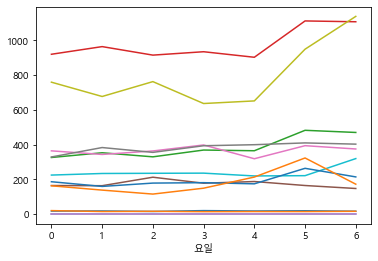

In [32]:
# 수목금토 칼럼 도출 그래프
실적데이터.pivot_table(index='요일', columns='상품군', values='주문량', aggfunc='mean').plot().legend().remove()

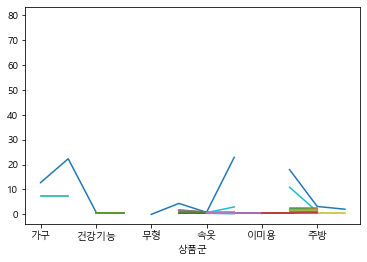

In [140]:
# 주32후 칼럼 도출 그래프
실적데이터.pivot_table(index='상품군', columns='주문량', values='판매단가', aggfunc='mean').plot().legend().remove()

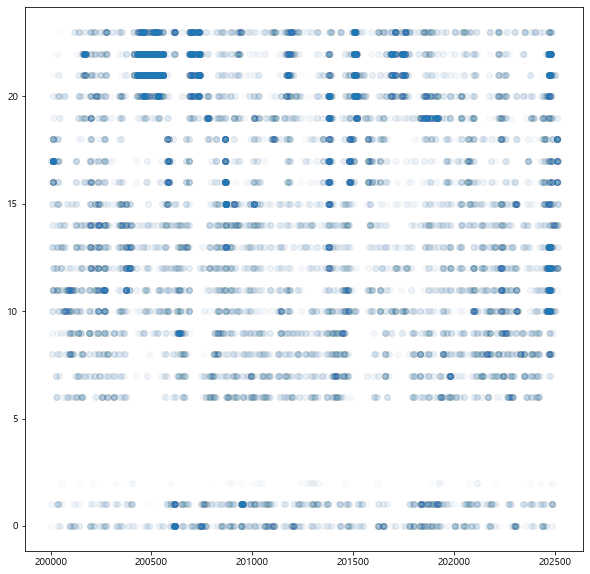

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(실적데이터.상품코드, 실적데이터.시, alpha=0.01)

In [100]:
# ---------------------------------------------- 파생변수 ------------------------------------------------------------
# 수목금토 / 일월화 칼럼 추가
실적데이터['수목금토'] = 실적데이터.요일.map(lambda X: X in [3,4,5,6]).map(lambda X: 1 if X else 0)

# 7,8,9월의 다른 추세 확인 후 칼럼 생성
실적데이터['월789'] = 실적데이터.월.map(lambda X: X in [7, 8, 9]).map(lambda X: 1 if X else 0)
#실적데이터['하반기'] = 실적데이터.월.map(lambda X: X in [7,8,9,10,11,12]).map(lambda X: 1 if X else 0)
# 실적데이터['가을'] = 실적데이터.월.map(lambda X: X in [9,10,11]).map(lambda X: 1 if X else 0)
# 실적데이터['겨울'] = 실적데이터.월.map(lambda X: X in [12,1,2]).map(lambda X: 1 if X else 0)

# 일 : 월초,말이랑 중간 비교 / 의미없음
#실적데이터['월말초'] = 실적데이터.일.map(lambda X: X in [1,2,3,4,5,6,27,28,29,30,31]).map(lambda X: 1 if X else 0)

# 판매단가 분포에 따른 분류
실적데이터['저가'] = 실적데이터.판매단가.map(lambda X: 1 if X <=30000 else 0)
실적데이터['중가'] = 실적데이터.판매단가.map(lambda X: 1 if 30000< X <= 400000  else 0)
실적데이터['고가'] = 실적데이터.판매단가.map(lambda X: 1 if X >400000  else 0)

# 노출 시간 
실적데이터['노출20미만'] = 실적데이터.노출.map(lambda X: 1 if X < 20  else 0)
실적데이터['노출2030'] = 실적데이터.노출.map(lambda X: 1 if 20 <= X < 30  else 0)
실적데이터['노출30이상'] = 실적데이터.노출.map(lambda X: 1 if X >= 30  else 0)

# 32주 기준으로 다른 추세 확인
실적데이터['주32후'] = 실적데이터.주.map(lambda X: 1 if X >= 32  else 0)

# 시간별 상품코드 배치 
실적데이터['시간1015사이20이후'] = 실적데이터.시.map(lambda X: 1 if X >= 20 or 10 < X < 15  else 0)

#실적데이터['시간6-9'] = 실적데이터.노출.map(lambda X: 1 if 6 < X < 21  else 0)

In [101]:
#-------------------------------------------통째로 칼럼화---------------------------------------------------------
# 요일 칼럼화
# 요일_0 ~ 요일_6
실적데이터 = pd.concat([실적데이터, pd.get_dummies(실적데이터.요일, prefix='요일')], axis=1)
실적데이터.drop('요일', axis=1, inplace=True)

# 월 칼럼화
# 1 ~ 12 -> 월_1, 월_2, ~ ,월_12
실적데이터 = pd.concat([실적데이터, pd.get_dummies(실적데이터.월, prefix='월')], axis=1)
실적데이터.drop('월', axis=1, inplace=True)

# 일 칼럼화
# 1 ~ 31 -> 일_1, 일_2, ~, 일_31
실적데이터 = pd.concat([실적데이터, pd.get_dummies(실적데이터.일, prefix='일')], axis=1)
실적데이터.drop('일', axis=1, inplace=True)

# 시 칼럼화
# 1 ~ 23 -> 시_1, 시_2, ~, 시_23
실적데이터 = pd.concat([실적데이터, pd.get_dummies(실적데이터.시, prefix='시')], axis=1)
실적데이터.drop('시', axis=1, inplace=True)

# 분 칼럼화
# 1 ~ 60 -> 분_1, 분_2, ~, 분_60
실적데이터 = pd.concat([실적데이터, pd.get_dummies(실적데이터.분, prefix='분')], axis=1)
실적데이터.drop('분', axis=1, inplace=True)

# 주 칼럼화
# 1 ~ 52 -> 주_1, 주_2, ~, 주_52
실적데이터 = pd.concat([실적데이터, pd.get_dummies(실적데이터.주, prefix='주')], axis=1)
실적데이터.drop('주', axis=1, inplace=True)

# 시간 칼럼화
#실적데이터 = pd.concat([실적데이터, pd.get_dummies(실적데이터.시간, prefix='시간')], axis=1)
#실적데이터.drop('시간', axis=1, inplace=True)

# 상품군 컬럼화
# ['가구', '가전', '건강기능', '농수축', '무형', '생활용품', '속옷', '의류', '이미용', '잡화','주방', '침구']
실적데이터 = pd.concat([실적데이터, pd.get_dummies(실적데이터.상품군)], axis=1)
실적데이터.drop('상품군', axis=1, inplace=True)

# 상품코드 칼럼화
# 1 ~ 52 -> 상품코드_1, 상품코드_2, ~, 상품코드_??
#실적데이터 = pd.concat([실적데이터, pd.get_dummies(실적데이터.상품코드, prefix='상품코드')], axis=1)
#실적데이터.drop('상품코드', axis=1, inplace=True)

# 마더코드 칼럼화
# 1 ~ 52 -> 상품코드_1, 상품코드_2, ~, 상품코드_??
#실적데이터 = pd.concat([실적데이터, pd.get_dummies(실적데이터.마더코드, prefix='상품코드')], axis=1)
#실적데이터.drop('마더코드', axis=1, inplace=True)

# 정규화 (선택)

In [399]:
# z정규화(표준편차를 이용해서 이상치의 영향을 덜 받는 정규화)

def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized


# 기존 데이터프레임 전처리
X_features = 실적데이터.drop('취급액', axis=1)
for i in X_features.columns:
    X_features[i] = z_score_normalize(X_features[i])
    
X_train, X_test, y_train, y_test = \
train_test_split(X_features, y_target ,test_size=0.3, random_state=0)

KeyboardInterrupt: 

In [460]:
# 0~1 정규화
minmaxScaler = MinMaxScaler()
X_features = minmaxScaler.fit_transform(X_features)
y_target = minmaxScaler.fit_transform(np.array(y_target).reshape(-1,1))
X_features

array([[0.40753828, 0.42658177, 0.63636364, ..., 0.25174825, 0.26086957,
        0.        ],
       [0.40753828, 0.42936729, 0.63636364, ..., 0.25174825, 0.26086957,
        0.        ],
       [0.40753828, 0.42658177, 0.63636364, ..., 0.26573427, 0.26086957,
        0.        ],
       ...,
       [0.52767962, 0.55312376, 0.90909091, ..., 0.99300699, 1.        ,
        0.16401274],
       [0.52767962, 0.55073617, 0.90909091, ..., 0.99300699, 1.        ,
        0.16401274],
       [0.52767962, 0.55352169, 0.90909091, ..., 0.99300699, 1.        ,
        0.16401274]])

In [85]:
# 상품군 컬럼화
# ['가구', '가전', '건강기능', '농수축', '무형', '생활용품', '속옷', '의류', '이미용', '잡화','주방', '침구']
실적데이터 = pd.concat([실적데이터, pd.get_dummies(실적데이터.상품군)], axis=1)
실적데이터.drop('상품군', axis=1, inplace=True)

# Data Split

In [102]:
# 독립변수 = 취급액, 분당평균시청률, 주문량 제외하고 전부
# 종속변수 = 주문량
실적데이터_test = 실적데이터
X_features = 실적데이터_test.drop(['취급액','주문량'], axis=1)
y_target = 실적데이터_test.주문량

# train test split
X_train, X_test, y_train, y_test = \
train_test_split(X_features, y_target ,test_size=0.3, random_state=0)

# XGBoost 

In [103]:
xgb_reg = XGBRegressor(n_estimators=500, gamma=0, learning_rate=0.4, max_depth=10, n_jobs=-1, random_state=1)

xgb_reg.fit(X_train, y_train) # early_stopping_rounds=200,
         # eval_set = [(X_test, y_test)], eval_metric='logloss')
    
xgb_reg.score(X_test, y_test)

0.8634609824288727

# AdaBoost

In [95]:
ada_reg = AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='exponential',
         n_estimators=100, random_state=0) 

ada_reg.fit(X_train, y_train)

y_pred = ada_reg.predict(X_test)

mt.r2_score(y_test, y_pred)

0.573287830395449

# KNN

In [96]:
knn_reg = KNeighborsRegressor(n_neighbors = 12, weights = "distance")
knn_reg.fit(X_train, y_train)

y_pred = knn_reg.predict(X_test)

mt.r2_score(y_test, y_pred)

0.627377405283748

# LGBMRegressor

In [91]:
# conda install lightgbm
lgbm_reg = LGBMRegressor()

len(X_train.columns) # len 뽑아서 열을 숫자 형태로 바꿔줘야 모델 학습 가능

35

In [98]:
# 위에서 뽑은 길이대로 숫자 리스트 만들어서 train 데이터 열 형태를 모두 수치화 후 학습
# 열 확인 위해서는 데이터 다시 가져와야 함
cols = []
for i in range(36):
        cols.append(str(i))
X_train.columns = cols

lgbm_reg.fit(X_train, y_train)
y_pred = lgbm_reg.predict(X_test)
mt.r2_score(y_test, y_pred)

0.8077126508951413

# 심층신경망

In [1]:
# 0~1 정규화 
# 필요한 행만 골라서 해야함


minmaxScaler = MinMaxScaler()
X_features = minmaxScaler.fit_transform(X_features)
y_target = minmaxScaler.fit_transform(np.array(y_target).reshape(-1,1))
X_features

NameError: name 'X_features' is not defined

In [59]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=91))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))



#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001), loss='mse', metrics=['mae'], )

model.summary()

ValueError: Could not interpret optimizer identifier: <tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop object at 0x0000023F7977CB48>

In [58]:
model.fit(X_train, y_train,
         epochs=10,
         batch_size=10,
         verbose=1)


Epoch 1/100
26810/26810 [==============================] - 4s 142us/step - loss: 401086.5252 - mae: 363.3697
Epoch 2/100
26810/26810 [==============================] - 4s 134us/step - loss: 175816.4339 - mae: 300.5848
Epoch 3/100
26810/26810 [==============================] - 4s 133us/step - loss: 174874.8837 - mae: 300.1752
Epoch 4/100
26810/26810 [==============================] - 4s 136us/step - loss: 174471.3460 - mae: 299.8890
Epoch 5/100
26810/26810 [==============================] - 4s 132us/step - loss: 174143.8399 - mae: 300.0258
Epoch 6/100
26810/26810 [==============================] - 4s 134us/step - loss: 173733.4598 - mae: 299.2783
Epoch 7/100
26810/26810 [==============================] - 4s 136us/step - loss: 172452.8055 - mae: 297.0161
Epoch 8/100
26810/26810 [==============================] - 4s 133us/step - loss: 169587.7870 - mae: 290.8944
Epoch 9/100
26810/26810 [==============================] - 4s 135us/step - loss: 165864.5623 - mae: 283.7162
Epoch 10/100
26810

26810/26810 [==============================] - 4s 140us/step - loss: 117882.8398 - mae: 207.7908
Epoch 74/100
26810/26810 [==============================] - 4s 135us/step - loss: 115835.6855 - mae: 206.4614
Epoch 75/100
26810/26810 [==============================] - 4s 133us/step - loss: 120977.1598 - mae: 205.3608
Epoch 76/100
26810/26810 [==============================] - 4s 136us/step - loss: 114612.8263 - mae: 203.8762
Epoch 77/100
26810/26810 [==============================] - 3s 129us/step - loss: 114358.2475 - mae: 205.0201
Epoch 78/100
26810/26810 [==============================] - 4s 138us/step - loss: 114066.2015 - mae: 204.7607
Epoch 79/100
26810/26810 [==============================] - 4s 132us/step - loss: 113481.9760 - mae: 203.6021
Epoch 80/100
26810/26810 [==============================] - 4s 136us/step - loss: 113665.1483 - mae: 202.5883
Epoch 81/100
26810/26810 [==============================] - 4s 138us/step - loss: 112707.4845 - mae: 202.5691
Epoch 82/100
26810/2681

# 그래프

# 평가데이터 취급액 예측

In [83]:
평가데이터 = 평가데이터1.copy()
# 컬럼명 변경
평가데이터.columns = ['방송일시', '노출', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액']

# 결측치 제거
평가데이터.취급액 = 평가데이터.취급액.fillna(0)
평가데이터.노출 = 평가데이터.노출.fillna(method = 'ffill')


평가데이터['요일'] = 평가데이터['방송일시'].dt.dayofweek
평가데이터['월']  = 평가데이터['방송일시'].dt.month
평가데이터['시간']  = 평가데이터['방송일시'].dt.time
평가데이터['시']  = 평가데이터['방송일시'].dt.hour
평가데이터['일'] = 평가데이터['방송일시'].dt.day

평가데이터['방송시간'] = 평가데이터.방송일시.apply(lambda x : str(x)).apply(lambda x : x.split(' ')[1][:])
평가데이터['시간'] = 평가데이터.시간.apply(lambda x : str(x)).apply(lambda x : int(x.split(':')[0])*60 + int(x.split(':')[1]))
평가데이터['방송날짜'] = 평가데이터.방송일시.apply(lambda x : str(x)).apply(lambda x : x.split(' ')[0])


# 시간 데이터 컬럼 삭제
평가데이터.drop(['방송시간', '방송일시', '방송날짜',], axis=1, inplace=True)

# 상품명 컬럼 삭제
평가데이터.drop('상품명', axis=1, inplace=True)

# 요일 칼럼화
# 월 화 수 목 금 토 일
평가데이터 = pd.concat([평가데이터, pd.get_dummies(평가데이터.요일)], axis=1)
평가데이터.columns = ['노출', '마더코드', '상품코드', '상품군', '판매단가', '취급액', '요일', '월', '시간',
                 '시', '일', '월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
평가데이터.drop('요일', axis=1, inplace=True)

# 월 칼럼화
# 1 ~ 12 -> 월_1, 월_2, ~ ,월_12
#평가데이터 = pd.concat([평가데이터, pd.get_dummies(평가데이터.월, prefix='월')], axis=1)
#평가데이터.drop('월', axis=1, inplace=True)

# 일 칼럼화
# 1 ~ 31 -> 일_1, 일_2, ~, 일_31
#평가데이터 = pd.concat([평가데이터, pd.get_dummies(평가데이터.일, prefix='일')], axis=1)
#평가데이터.drop('일', axis=1, inplace=True)

# 시 칼럼화
# 1 ~ 23 -> 시_1, 시_2, ~, 시_23
#평가데이터 = pd.concat([평가데이터, pd.get_dummies(평가데이터.시, prefix='시')], axis=1)
#평가데이터.drop('시', axis=1, inplace=True)

# 상품군 컬럼화
# ['가구', '가전', '건강기능', '농수축', '무형', '생활용품', '속옷', '의류', '이미용', '잡화','주방', '침구']
평가데이터 = pd.concat([평가데이터, pd.get_dummies(평가데이터.상품군)], axis=1)
평가데이터.drop('상품군', axis=1, inplace=True)

평가데이터

,노출,마더코드,상품코드,판매단가,취급액,월,시간,시,일,월요일,...,건강기능,농수축,무형,생활용품,속옷,의류,이미용,잡화,주방,침구
0,20.000000,100650,201971,59800,0.0,6,380,6,1,1,...,0,0,0,0,0,1,0,0,0,0
1,20.000000,100650,201971,59800,0.0,6,400,6,1,1,...,0,0,0,0,0,1,0,0,0,0
2,20.000000,100650,201971,59800,0.0,6,420,7,1,1,...,0,0,0,0,0,1,0,0,0,0
3,20.000000,100445,202278,69900,0.0,6,440,7,1,1,...,0,0,0,0,1,0,0,0,0,0
4,20.000000,100445,202278,69900,0.0,6,460,7,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,20.000000,100660,201989,0,0.0,7,20,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2887,20.000000,100660,201989,0,0.0,7,40,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2888,20.000000,100660,201989,0,0.0,7,60,1,1,0,...,0,0,1,0,0,0,0,0,0,0
2889,20.000000,100261,200875,69900,0.0,7,80,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [108]:
pip install urllib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [106]:
from urllib2 import Request, urlopen
from urllib import urlencode, quote_plus

url = 'http://apis.data.go.kr/1360000/LivingWthrIdxService/getWindChillIdx'
queryParams = '?' + urlencode({ quote_plus('ServiceKey') : 'eFIDpX%2Bvwb%2FDGF2Cv7uCb58654qc5GfUX2uv%2Fz87urhwLgpB2CVOfn%2B1bvhpIAN1ep8vdFk4iI8sqsNW1eKFQQ%3D%3D', quote_plus('ServiceKey') : '-', quote_plus('pageNo') : '1', quote_plus('numOfRows') : '10', quote_plus('dataType') : 'XML', quote_plus('areaNo') : '1100000000', quote_plus('time') : '2017030806' })

request = Request(url + queryParams)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
print (response_body)

ModuleNotFoundError: No module named 'urllib2'